In [7]:
import os
import sys
parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(parent_dir)
from pathlib import Path
import pandas as pd
import numpy as np

from datasets.data_reconstruction import get_and_reconstruct_data, reconstruct_solver_and_grid
from patchwork import Patchwork
from data_generation.visualization.create_plots import plot_2D_vector_field_over_grid


In [8]:
db_name = os.path.join(parent_dir, 'datasets', 'results', 'simulation_results.db')
table_name = 'TechnologySubstitution_gamma2'  
run_ids = ['20250218_112310'] # 20250218_112130, 20250218_112310, 20250218_112334

In [9]:
df, configs_dict = get_and_reconstruct_data(db_name, table_name, run_ids)

# Check if all configurations are the same
all_equal = all(configs_dict[run_id] == configs_dict[run_ids[0]] for run_id in run_ids)
print("All configurations are the same:", all_equal)

grid, solver = reconstruct_solver_and_grid(run_ids[0], configs_dict)


All configurations are the same: True


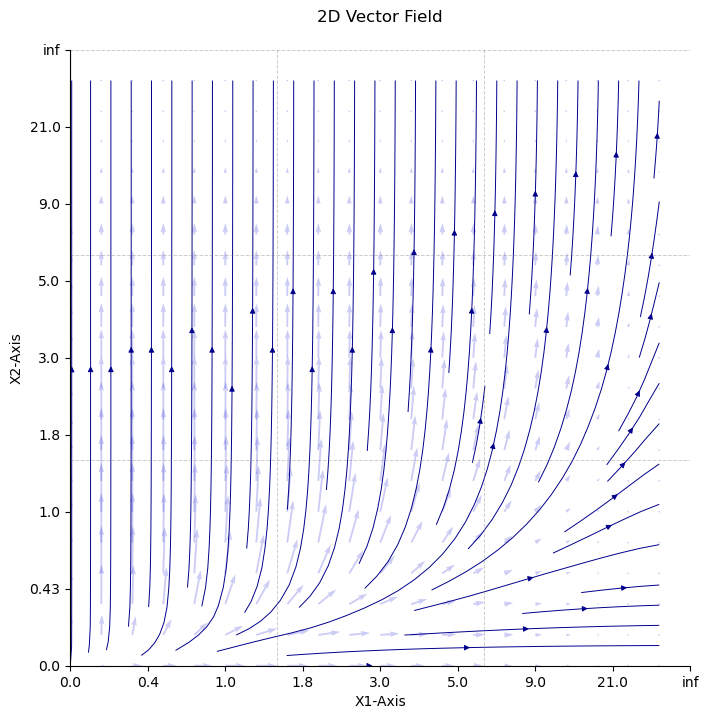

In [12]:

plot_2D_vector_field_over_grid(grid, solver, control=np.array(df['c'][0]), display_vectorfield=True, resolution = 21)


In [11]:
patchwork = Patchwork(grid, df, configs_dict)
patchwork.trans_probs

{0: {(0.5,): {0: 0.5, 1: 0.3, 3: 0.1, 4: 0.1}},
 1: {(0.5,): {1: 0.6, 2: 0.4}},
 2: {(0.5,): {2: 1.0}},
 3: {(0.5,): {3: 0.3, 4: 0.3, 6: 0.3, 7: 0.1}},
 4: {(0.5,): {4: 0.7, 5: 0.3}},
 5: {(0.5,): {5: 1.0}},
 6: {(0.5,): {6: 0.9, 7: 0.1}},
 7: {(0.5,): {7: 1.0}},
 8: {(0.5,): {8: 1.0}}}